In [1]:
import sys
sys.path.append(r'D:\Python ML\SA-geochemical-maps\src')
import cartopy.crs as ccrs
from matplotlib.colors import BoundaryNorm, LogNorm
import matplotlib.pyplot as plt
import matplotlib as mpl


import create_chem_dataset as ccd
import max_dh_chem as mdc
from interpolation import MapBase, interpolate

import pandas as pd
import numpy as np

In [2]:
source_path = r'D:\Unearthed_SARIG_Data_Package\SARIG_Data_Package\sarig_rs_chem_exp.csv'
out_path = r'D:\Python ML\SA-geochemical-maps\Data\Processed_2'
drill_hole_spatial = r'D:\Python ML\SA-geochemical-maps\Data\interim\DH_data.csv'
method_path = r'D:\Python ML\SA-geochemical-maps\notebooks\chem_method_code_map.csv'


In [3]:
elements = ['Fe2O3','U','Ag','Pb','Cu','Zn','Co','Li','Ni','Fe','NiO', 'U3O8', 'Au', 'FeO', 'CoO']

element = 'Cu'

In [4]:
clean_Cu = ccd.create_dh_chem_data(source_path, element, method_path, out_path)


Need to remove spurious samples and holes as determined during the EDA phase, before determining max DH value

In [5]:
clean_Cu.drop(clean_Cu[clean_Cu.DETERMINATION.str.contains(r'unknown', na=False, regex=False)].index, inplace=True)
clean_Cu.drop(clean_Cu[clean_Cu.DETERMINATION.str.contains(r'UKN', na=False, regex=False)].index, inplace=True)
clean_Cu.drop(clean_Cu[clean_Cu.DETERMINATION.str.contains(r'pXRF', na=False, regex=False)].index, inplace=True)
clean_Cu.drop(clean_Cu[clean_Cu.DETERMINATION.str.contains(r'unknown', na=False, regex=False)].index, inplace=True)


In [6]:
norm_data = mdc.max_dh_chem(clean_Cu, drill_hole_spatial)

In [7]:
clean_Cu.head()

,SAMPLE_NO,SAMPLE_SOURCE_CODE,DRILLHOLE_NUMBER,DH_DEPTH_FROM,DH_DEPTH_TO,SAMPLE_ANALYSIS_NO,ANALYSIS_TYPE_DESC,LABORATORY,CHEM_CODE,VALUE,UNIT,CHEM_METHOD_CODE,BDL,converted_ppm,DETERMINATION,DIGESTION,FUSION
11428,9670,DC,6363.0,57.91,59.13,5476,GEOCHEMISTRY,NaN,Cu,20.0,ppm,AES,0,20.0,ICP-AES,N/S,unknown
16409,658672,DC,353.0,1494.43,1494.74,1630286,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Cu,14.0,ppm,IC3M,0,14.0,ICP-MS,MA,unknown
16457,658673,DC,353.0,1495.35,1495.65,1630287,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Cu,5.5,ppm,IC3M,0,5.5,ICP-MS,MA,unknown
16673,658670,DC,353.0,1405.43,1405.74,1630281,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Cu,32.0,ppm,IC3M,0,32.0,ICP-MS,MA,unknown
16697,658670,DC,353.0,1405.43,1405.74,1630282,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Cu,30.0,ppm,IC3M,0,30.0,ICP-MS,MA,unknown


In [8]:
norm_data['times_ave_crustal_abund'] = norm_data.converted_ppm.apply(lambda x: x / 27)

In [9]:
norm_data.head()

,SAMPLE_NO,SAMPLE_SOURCE_CODE,DRILLHOLE_NUMBER,DH_DEPTH_FROM,DH_DEPTH_TO,SAMPLE_ANALYSIS_NO,ANALYSIS_TYPE_DESC,LABORATORY,CHEM_CODE,VALUE,...,BDL,converted_ppm,DETERMINATION,DIGESTION,FUSION,DH_NAME,SITE_NO,LONGITUDE_GDA2020,LATITUDE_GDA2020,times_ave_crustal_abund
0,2255807,HCORE,293374.0,428.0,429.0,1792224,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Cu,261.0,...,0,261.0,ICP-MS,MA,unknown,HDD-123,2043603,137.867236,-34.542074,9.666667
1,2606676,DC,312839.0,66.0,69.0,2130057,GEOCHEMISTRY,"Genalysis Laboratory Services Pty Ltd, W.A.",Cu,9.0,...,0,9.0,ICP-OES,4A,unknown,DD09CLS002,2090250,135.515616,-29.575037,0.333333
2,2080457,CT,148.0,350.0,352.0,1637275,GEOCHEMISTRY,"Comlabs Pty Ltd, S.A.",Cu,300.0,...,0,300.0,AAS,N/S,unknown,BN 1,182,129.166978,-31.168831,11.111111
3,2701731,CT,314872.0,33.0,37.0,2224023,GEOCHEMISTRY,"ALS Chemex, Adelaide SA",Cu,40.0,...,0,40.0,ICP-AES,4A,unknown,WEA214,2098028,132.920928,-29.669633,1.481481
4,674936,CT,202385.0,20.0,24.0,297110,GEOCHEMISTRY,"Analabs, Adelaide",Cu,4.2,...,0,4.2,AAS,AR,unknown,NHRAB 69,837394,134.789376,-31.669539,0.155556


In [10]:
norm_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253937 entries, 0 to 253936
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   SAMPLE_NO                253937 non-null  int64  
 1   SAMPLE_SOURCE_CODE       253911 non-null  object 
 2   DRILLHOLE_NUMBER         253937 non-null  float64
 3   DH_DEPTH_FROM            253761 non-null  float64
 4   DH_DEPTH_TO              253521 non-null  float64
 5   SAMPLE_ANALYSIS_NO       253937 non-null  int64  
 6   ANALYSIS_TYPE_DESC       253937 non-null  object 
 7   LABORATORY               242209 non-null  object 
 8   CHEM_CODE                253937 non-null  object 
 9   VALUE                    253937 non-null  float64
 10  UNIT                     253937 non-null  object 
 11  CHEM_METHOD_CODE         253937 non-null  object 
 12  BDL                      253937 non-null  int64  
 13  converted_ppm            253937 non-null  float64
 14  DETE

In [11]:
norm_data.loc[norm_data['converted_ppm'].idxmax()]

SAMPLE_NO                        104219
SAMPLE_SOURCE_CODE                   CT
DRILLHOLE_NUMBER               143535.0
DH_DEPTH_FROM                      16.0
DH_DEPTH_TO                        18.0
SAMPLE_ANALYSIS_NO                79300
ANALYSIS_TYPE_DESC         GEOCHEMISTRY
LABORATORY                          NaN
CHEM_CODE                            Cu
VALUE                          320000.0
UNIT                                ppm
CHEM_METHOD_CODE                    AAS
BDL                                   0
converted_ppm                  320000.0
DETERMINATION                       AAS
DIGESTION                           N/S
FUSION                          unknown
DH_NAME                          MP 816
SITE_NO                          173540
LONGITUDE_GDA2020            137.616549
LATITUDE_GDA2020             -34.040366
times_ave_crustal_abund    11851.851852
Name: 22554, dtype: object

In [12]:
norm_data.times_ave_crustal_abund.min()

3.7037037037037037e-05

In [13]:
max_v, min_v = norm_data.times_ave_crustal_abund.max().astype(int), norm_data.times_ave_crustal_abund.min().astype(int) 
print(f'For the element {element}: the max value range is {max_v}, while the min is {min_v}')

proj = ccrs.epsg(3107)   #GDA 94/SA Lambert
levels = list(range(min_v, max_v, 1))
cmap = plt.get_cmap('plasma')
#norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
log_norm = LogNorm()
n_dh = len(norm_data.DRILLHOLE_NUMBER)

For the element Cu: the max value range is 11851, while the min is 0


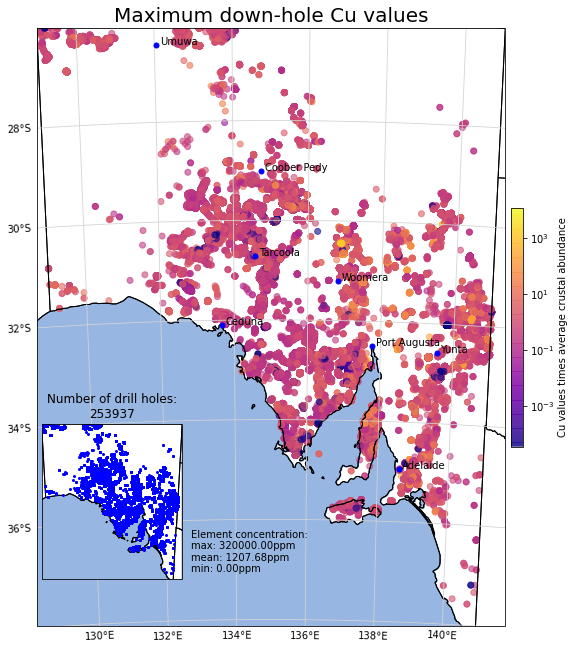

In [14]:
mpl.rcParams['agg.path.chunksize'] = 10000

title = f'Maximum down-hole {element} values'
label = f'{element} values times average crustal abundance'
out_fig = out_path+'\\'+f'Max_downhole_{element}.jpg'
inset_title = f'Number of drill holes:\n{n_dh}'
x, y = norm_data.LONGITUDE_GDA2020.values, norm_data.LATITUDE_GDA2020.values
max_val, min_val, mean_val = norm_data.converted_ppm.max(), norm_data.converted_ppm.min(), norm_data.converted_ppm.mean()
annot = f'Element concentration:\nmax: {max_val:.2f}ppm\nmean: {mean_val:.2f}ppm\nmin: {min_val:.2f}ppm'

fig, view, inset = MapBase(proj, title, inset_title)
plot = view.scatter(x, y, c=norm_data.times_ave_crustal_abund, cmap=cmap, norm=log_norm, alpha=0.6, transform=ccrs.PlateCarree())
fig.colorbar(plot, ax=view, shrink=.4, pad=0.01, label=label) #boundaries=levels, 
inset.plot(x, y,color='blue', marker='o', markersize=2, linestyle='None', transform=ccrs.Geodetic())
    
view.annotate(text=annot, xy=(0.33,0.09), xycoords='axes fraction')
plt.savefig(out_fig, dpi=300, bbox_inches='tight')
plt.show()

In [15]:
gx, gy, img = interpolate(norm_data, proj)

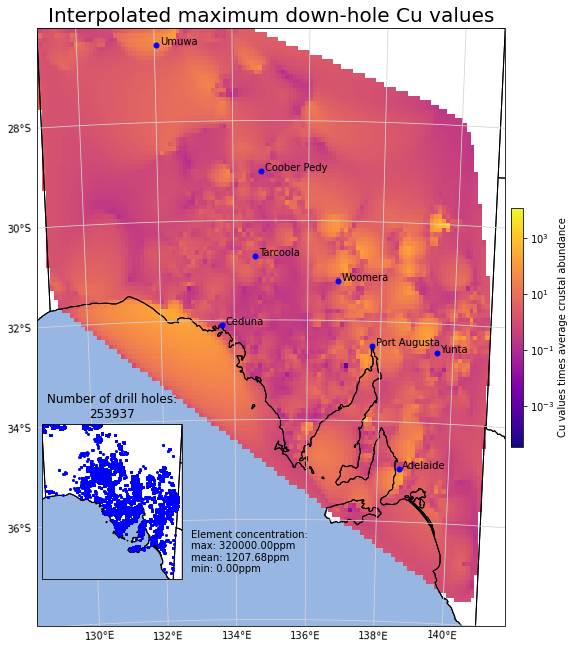

In [16]:
title = f'Interpolated maximum down-hole {element} values'
label = f'{element} values times average crustal abundance'
out_fig = out_path+'\\'+f'Interp_Max_downhole_{element}.jpg'
inset_title = f'Number of drill holes:\n{n_dh}'
x, y = norm_data.LONGITUDE_GDA2020.values, norm_data.LATITUDE_GDA2020.values
max_val, min_val, mean_val = norm_data.converted_ppm.max(), norm_data.converted_ppm.min(), norm_data.converted_ppm.mean()
annot = f'Element concentration:\nmax: {max_val:.2f}ppm\nmean: {mean_val:.2f}ppm\nmin: {min_val:.2f}ppm'

fig, view, inset = MapBase(proj, title, inset_title)
mmb = view.pcolormesh(gx, gy, img, cmap=cmap, norm=log_norm)
fig.colorbar(mmb, ax=view, shrink=.4, pad=0.01, label=label) #boundaries=levels, 
inset.plot(x, y,color='blue', marker='o', markersize=2, linestyle='None', transform=ccrs.Geodetic())
    
view.annotate(text=annot, xy=(0.33,0.09), xycoords='axes fraction')
plt.savefig(out_fig, dpi=300, bbox_inches='tight')
plt.show()